In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [73]:
alphap = 2
probp = 0.75
expon = 2 * alphap - 1
ensemble_sizep = 100*1
min_iterationp = 1000_000
bin_sizep = 0.0001

## Defining directory

In [74]:
dir_data = "../../data/alpha{}/".format(alphap)
dir_fig  ="../../figures/alpha{}/".format(alphap)


## While testing
dir_data = "../../data/temp/alpha{}/".format(alphap)
dir_fig  ="../../figures/temp/alpha{}/".format(alphap)

# create directory if it does not exists
for dir_name in [dir_data, dir_fig]:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
        print("directory ", dir_name, " is created")
    else:
        print("directory ", dir_name, " exists")

directory  ../../data/temp/alpha2/  exists
directory  ../../figures/temp/alpha2/  exists


In [75]:
figure_name = dir_fig + "pn_data_coll_alpha_3.pdf"

In [76]:
%run ../../stochastic_fractal_m.py

## Simulation using class

In [77]:
stochastic_frag = TrueLengths(alpha=alphap, probability=probp)

kwargs  {'alpha': 2, 'probability': 0.75}
Turning on logging


In [78]:
# lengths_enselbme = stochastic_frag.run_ensemble(ensemble_size, total_iteration)

In [79]:
ana_soln = AnalyticSoln()

## Other functions

In [80]:
def bin_maker(max_value, bin_number):
    bin_size = max_value/bin_number
    bins = [0.]
    for i in range(bin_number):
        bin_edge = (i+1)*bin_size
        bins.append(bin_edge)
        pass
    return bins

In [81]:
def histrogram_data(data, bin_size = bin_sizep):
    bin_number = int((np.max(data) - np.min(data))//bin_size) + 1
    y, x = np.histogram(data, bins = bin_number)
    return x[1:], y

## fitting data

$\phi \equiv \text{simulation}$
$\phi^{(th)} \equiv \text{theoritical or analytical}$

$$cost = \sum_t \sum_i (b*\phi_{i t} - \phi_{i t}^{(th)})^2 \$$

we need to minimize $cost$. We get the value of $b$ as

$$b = \frac{\sum_t \sum_i \phi_{i t} \phi_{i t}^{(th)}}{\sum_t \sum_i \phi_{i t}^2}$$

In [82]:
def fitting_parameter(given_array,ref_array):
    a1 = np.multiply(given_array,ref_array)
    a2 = np.multiply(given_array,given_array)
    a1_sum = np.sum(a1)
    a2_sum = np.sum(a2)
    return a1_sum, a2_sum

In [83]:
def plot_data(total_iteration):
    df = ana_soln.find_df(alphap,probp)
    
    # doing the simulation here
    ens_data = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)  # from class
    x,y = histrogram_data(ens_data)
    xi = x*total_iteration**(1/(2*alphap-1))
    phi = y/(total_iteration**((1+df)/(2*alphap-1)))
    xi, phi_analytic = ana_soln.phi_list(alphap,probp,xi)  # from class
#     print(len(phi_analytic))
    a1_sum, a2_sum = fitting_parameter(phi, phi_analytic)
    print(a1_sum, ", ", a2_sum)
    return xi, phi, a1_sum, a2_sum

In [84]:
data_dict = {}
a1_sum, a2_sum = 0,0
for i in range(3):
    time_t = min_iterationp*(i+1)
    xi, phi, a1, a2 = plot_data(time_t)
    data_dict[time_t]=[xi,phi]
    a1_sum += a1
    a2_sum += a2
    
for time_t in data_dict.keys():
    data_dict[time_t][1]*=(a1_sum/a2_sum)

realization  1  . Time spent  1.1272907257080078  sec
realization  2  . Time spent  1.0349485874176025  sec
realization  3  . Time spent  1.322688341140747  sec
realization  4  . Time spent  1.1377520561218262  sec
realization  5  . Time spent  1.1493585109710693  sec
realization  6  . Time spent  1.1720705032348633  sec
realization  7  . Time spent  1.7267630100250244  sec
realization  8  . Time spent  2.091526985168457  sec
realization  9  . Time spent  1.0679755210876465  sec
realization  10  . Time spent  1.4266693592071533  sec
realization  11  . Time spent  1.3192236423492432  sec
realization  12  . Time spent  1.0539233684539795  sec
realization  13  . Time spent  1.1681034564971924  sec
realization  14  . Time spent  1.7777268886566162  sec
realization  15  . Time spent  1.217480182647705  sec
realization  16  . Time spent  2.236644983291626  sec
realization  17  . Time spent  1.221160650253296  sec
realization  18  . Time spent  1.1406402587890625  sec
realization  19  . Time 

realization  50  . Time spent  2.802180290222168  sec
realization  51  . Time spent  2.1422739028930664  sec
realization  52  . Time spent  2.2589356899261475  sec
realization  53  . Time spent  2.439703941345215  sec
realization  54  . Time spent  2.8242645263671875  sec
realization  55  . Time spent  2.029688596725464  sec
realization  56  . Time spent  2.034682273864746  sec
realization  57  . Time spent  1.9398059844970703  sec
realization  58  . Time spent  2.146883726119995  sec
realization  59  . Time spent  3.452100992202759  sec
realization  60  . Time spent  2.1227855682373047  sec
realization  61  . Time spent  2.067667007446289  sec
realization  62  . Time spent  2.084413528442383  sec
realization  63  . Time spent  2.849266290664673  sec
realization  64  . Time spent  2.548093318939209  sec
realization  65  . Time spent  2.9496285915374756  sec
realization  66  . Time spent  2.3418352603912354  sec
realization  67  . Time spent  3.6218574047088623  sec
realization  68  . T

realization  100  . Time spent  3.6426572799682617  sec
Total time spent  402.5393924713135  sec
1.0395425528914708 ,  0.01643528845427809


In [85]:
data_dict.keys()

dict_keys([1000000, 2000000, 3000000])

### Saving data for later use

In [86]:
signature = 'data_collapse_alpha_{}_t_{}k'
for time_t in data_dict.keys():
    x,y = data_dict[time_t]
    file_name = signature.format(alphap, int(time_t//1000))
    np.savetxt(dir_data+file_name,np.c_[x,y])

## Plotting

../../figures/temp/alpha2/pn_data_coll_alpha_3.pdf


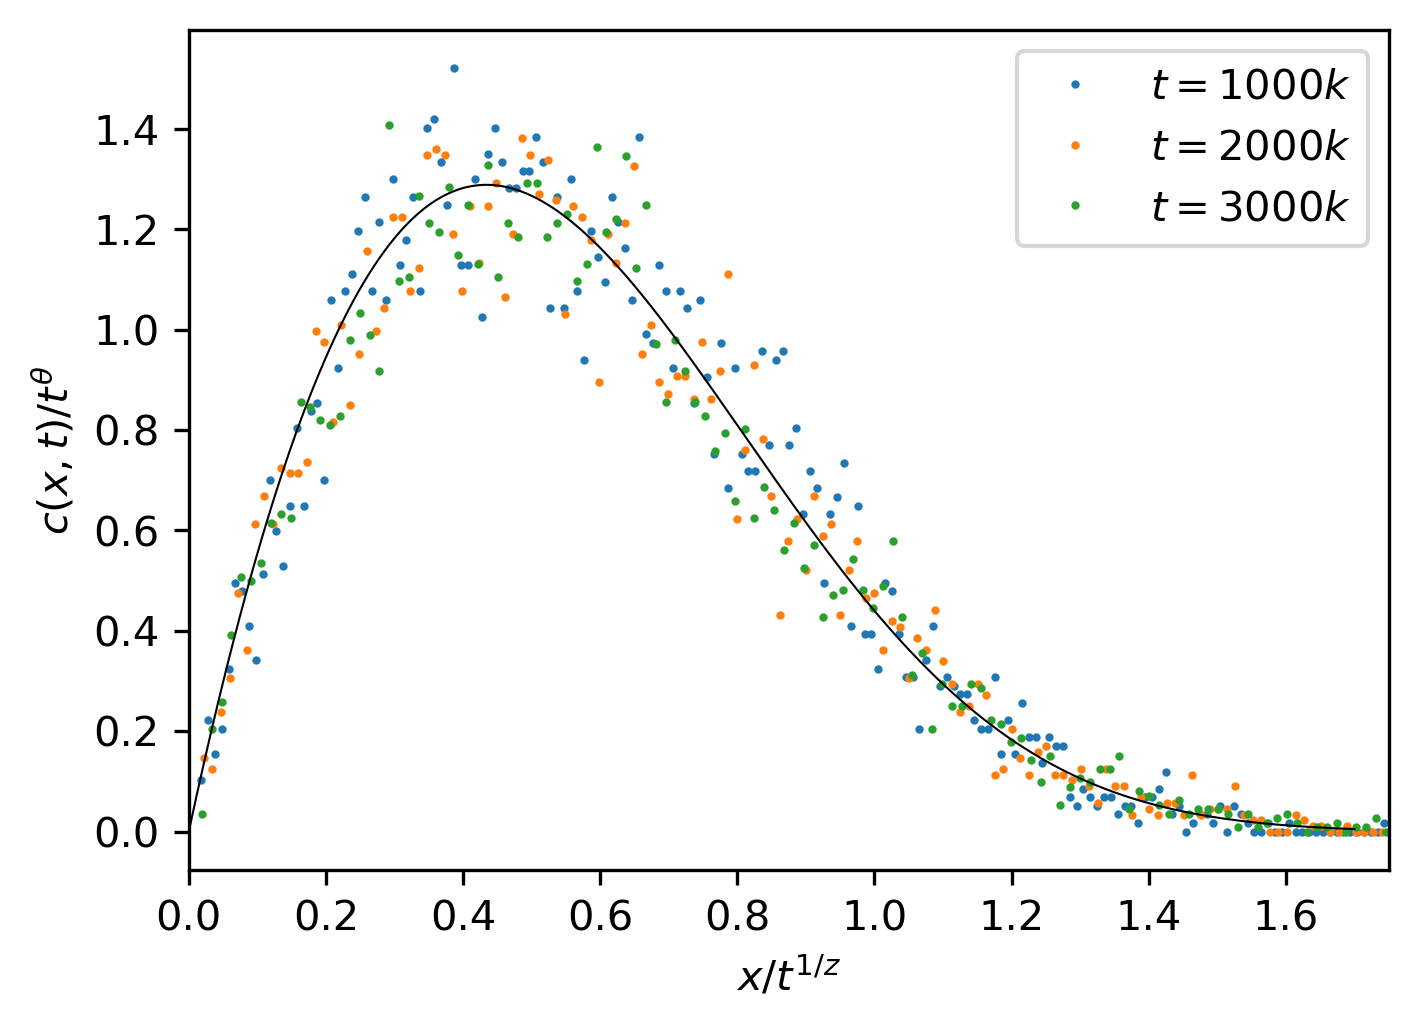

In [87]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)

for i in range(3):
    time_t = min_iterationp*(i+1)
    x,y = data_dict[time_t]
    plt.plot(x, y,"o", markersize=1,label=r"$t={}k$".format(str(int(time_t//1000))))

xi_th = np.linspace(0,1.7,8501)
xis, phi_th = ana_soln.phi_list(alphap,probp,xi_th)  # from class
plt.plot(xi_th, phi_th,color='black',linewidth=0.5)

plt.legend(loc=1)
plt.xlabel(r"$x/t^{1/z}$")
plt.ylabel(r"$c(x,t)/t^\theta$")
plt.xlim([0, 1.75])
axes.set_position([0.15, 0.15, 0.8, 0.8])

print(figure_name)
# plt.savefig(figure_name)